#  MNIST Dataset

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Loading the MNIST Dataset

The dataset is a collection of images of hand-written digits (0-9).

- Number of Training Data Points = 60K
- Number of Testing Data Points = 10K
- Images Resolution = 28 x 28

In [34]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

# Scale the pixels from (0, 255) to (0, 1)
x_train_norm = tf.keras.utils.normalize(x_train, axis=1)
x_test_norm = tf.keras.utils.normalize(x_test, axis=1)

### Displaying a Sample Image

Training Data Points: (60000, 28, 28)
Testing Data Points: (10000, 28, 28)


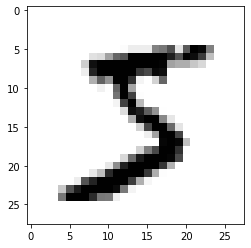

In [35]:
print(f"Training Data Points: {x_train.shape}")
print(f"Testing Data Points: {x_test.shape}")

plt.imshow(x_train[0], cmap="binary")
plt.show()

## 2. Creating the Model

In [36]:
model = Sequential()

# Input Layer
model.add(Flatten())

# Hidden Layers
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))

# Output Layer
model.add(Dense(units=10, activation="softmax"))

# Compiling the Model
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## 3. Fitting the Model

In [37]:
fitting_history = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), batch_size=1000, epochs=10, verbose=2)
print(fitting_history.history.keys())

Epoch 1/10
60/60 - 12s - loss: 0.9548 - accuracy: 0.7754 - val_loss: 0.3468 - val_accuracy: 0.9030
Epoch 2/10
60/60 - 1s - loss: 0.3026 - accuracy: 0.9129 - val_loss: 0.2586 - val_accuracy: 0.9264
Epoch 3/10
60/60 - 1s - loss: 0.2377 - accuracy: 0.9317 - val_loss: 0.2151 - val_accuracy: 0.9364
Epoch 4/10
60/60 - 1s - loss: 0.1966 - accuracy: 0.9434 - val_loss: 0.1893 - val_accuracy: 0.9412
Epoch 5/10
60/60 - 1s - loss: 0.1680 - accuracy: 0.9511 - val_loss: 0.1651 - val_accuracy: 0.9493
Epoch 6/10
60/60 - 1s - loss: 0.1448 - accuracy: 0.9582 - val_loss: 0.1492 - val_accuracy: 0.9543
Epoch 7/10
60/60 - 1s - loss: 0.1278 - accuracy: 0.9628 - val_loss: 0.1390 - val_accuracy: 0.9594
Epoch 8/10
60/60 - 1s - loss: 0.1125 - accuracy: 0.9673 - val_loss: 0.1288 - val_accuracy: 0.9611
Epoch 9/10
60/60 - 1s - loss: 0.1023 - accuracy: 0.9699 - val_loss: 0.1201 - val_accuracy: 0.9621
Epoch 10/10
60/60 - 1s - loss: 0.0916 - accuracy: 0.9735 - val_loss: 0.1153 - val_accuracy: 0.9640
dict_keys(['loss',

## 4. Plotting the Model's Metrics

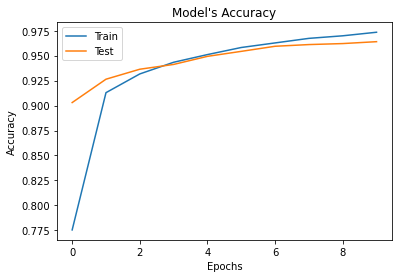

In [38]:
plt.plot(fitting_history.history["accuracy"])
plt.plot(fitting_history.history["val_accuracy"])
plt.title("Model's Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.show()

## 5. Predicting Validation Data

313/313 [==============================] - 0s 1ms/step


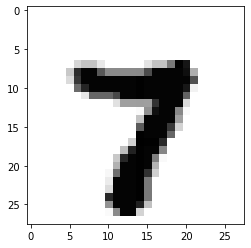

Prediction: 7


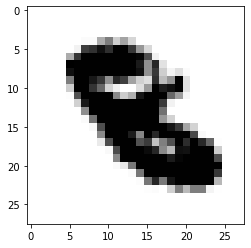

Prediction: 8


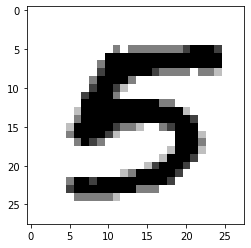

Prediction: 5


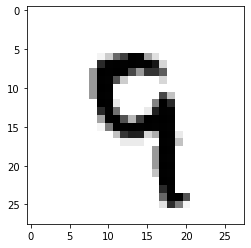

Prediction: 9


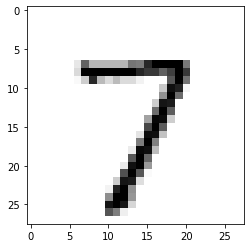

Prediction: 7


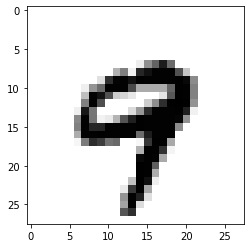

Prediction: 9


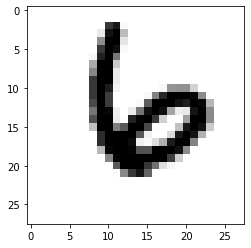

Prediction: 6


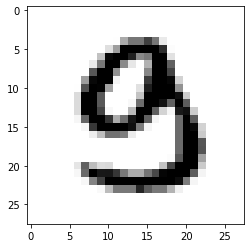

Prediction: 9


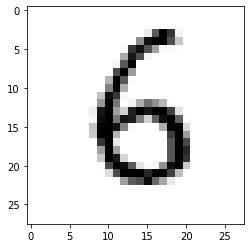

Prediction: 6


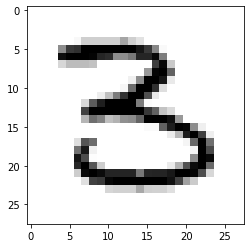

Prediction: 3


In [50]:
predictions = model.predict(x_test_norm, verbose=1)

for i in range(1100, 1110):
    
    plt.imshow(x_test[i], cmap="binary")
    plt.show()
    
    print(f"Prediction: {np.argmax(predictions[i])}")

In [48]:
print(x_test_norm[i])
print(x_test_norm[i].shape)
print(x_test_norm)
print(x_test_norm.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## 6. Save the Model

In [41]:
model.save("digit_recognition_model")

INFO:tensorflow:Assets written to: digit_recognition_model\assets
